In [57]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [50]:
Org=cv.imread("Samples/3.jpg")
Org=cv.resize(Org,(400,round(Org.shape[0]/Org.shape[1]*400)))
I=cv.cvtColor(Org,cv.COLOR_RGB2GRAY)


I=cv.GaussianBlur(I,(3,3),1.5)
I= cv.Canny(I,50,150,apertureSize = 3)
I_Hor= cv.morphologyEx(I, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,1)))
I_Hor= cv.morphologyEx(I_Hor, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT,(5,1)))
I_Vert= cv.morphologyEx(I, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(1,3)))
I_Vert= cv.morphologyEx(I_Vert, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT,(1,5)))
I=(I_Hor+I_Vert)/2

kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))
I=cv.morphologyEx(I,cv.MORPH_CLOSE,kernel)
I=abs(I-np.max(I))
I=np.array(I,dtype=np.uint8)
I=cv.cvtColor(I,cv.COLOR_GRAY2BGR)

True

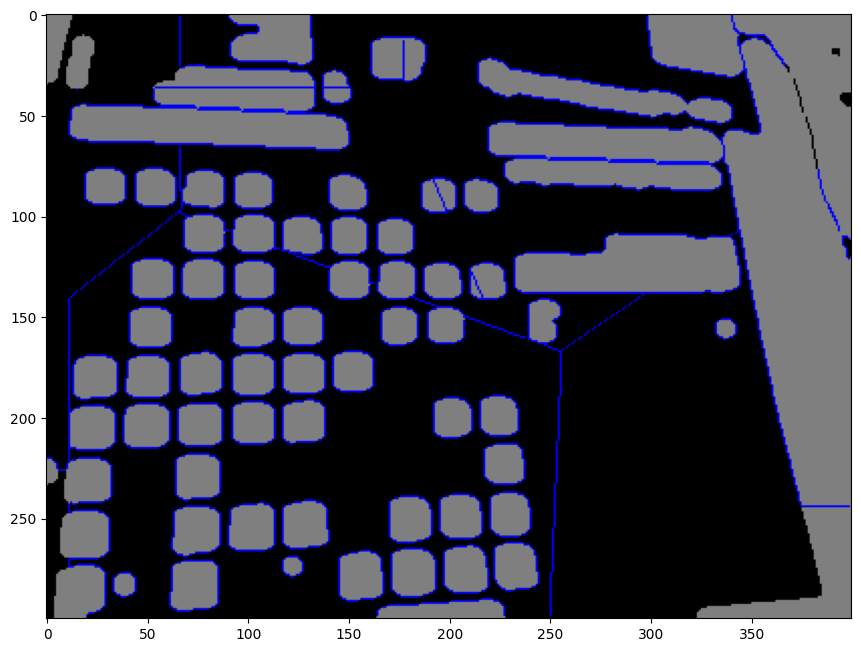

In [58]:
#seeds = cv.ximgproc.createSuperpixelSEEDS(Org.shape[1], Org.shape[0], 3,100, 30, 5, 2)
I=I
seeds=cv.ximgproc.createSuperpixelSLIC(I, cv.ximgproc.SLIC, 150,60)
seeds.iterate(3)

        # retrieve the segmentation result
labels = seeds.getLabels()

mask = seeds.getLabelContourMask(False)

color_img = np.zeros((Org.shape[0],Org.shape[1],3), np.uint8)
color_img[:] = (0, 0, 255)
        # stitch foreground & background together
mask_inv = cv.bitwise_not(mask)
result_bg = cv.bitwise_and(I, I, mask=mask_inv)
result_fg = cv.bitwise_and(color_img, color_img, mask=mask)
result = cv.add(result_bg, result_fg)

plt.imshow(result)
cv.imwrite("Boxes.jpg",result)